
Import Python libraries
---




In [ ]:
!pip install imblearn --upgrade
!pip install plotly --upgrade
!pip install chart-studio --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 74.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 1.4 MB/s eta 0:00:00


Import other required libraries

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly as plotly
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import types
import pandas as pd
def __iter__(self): return 0

Import data from github

In [ ]:
#Remove the data if you run this notebook more than once
!rm equipment_failure_data_1.csv
#import first half from github
!wget https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv
# Convert csv to pandas dataframe
pd_data_1 = pd.read_csv("equipment_failure_data_1.csv", sep=",", header=0)
#Remove the data if you run this notebook more than once
!rm equipment_failure_data_2.csv
#Import the second half from github
!wget https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_2.csv
# convert to pandas dataframe
pd_data_2 = pd.read_csv("equipment_failure_data_2.csv", sep=",", header=0)
#concatenate the two data files into one dataframe
pd_data=pd.concat([pd_data_1, pd_data_2])

rm: cannot remove 'equipment_failure_data_1.csv': No such file or directory
--2023-07-19 22:27:27--  https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11219474 (11M) [text/plain]
Saving to: ‘equipment_failure_data_1.csv’

equipment_failure_d 100%[===================>]  10.70M  --.-KB/s    in 0.06s   

2023-07-19 22:27:27 (182 MB/s) - ‘equipment_failure_data_1.csv’ saved [11219474/11219474]

rm: cannot remove 'equipment_failure_data_2.csv': No such file or directory
--2023-07-19 22:27:27--  https://raw.githubusercontent.com/shadgriffin/machine_failure/master/equipment_failure_data_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.

In [ ]:
pd_data.to_csv('output.csv', index=False)

In [ ]:

pd_data.head()


,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [ ]:
pd_data.shape

(307751, 16)

In [ ]:
xxxx = pd.DataFrame(pd_data.groupby(['ID']).agg(['count']))
xxxx.shape

(421, 15)

We have 731 unique dates. So if we have 421 machines and 731 unique dates, we should have 307,751 total records. Based on the .shape command, we have one record per machine per date value. There are no duplicates in the data frame.

In [ ]:
xxxx = pd.DataFrame(pd_data.groupby(['DATE']).agg(['count']))
xxxx.shape

(731, 15)

To cross check we again check if there are any duplicates in the dataset

In [ ]:
df_failure_thingy=pd_data
df_failure_thingy=df_failure_thingy.drop_duplicates(subset=['ID','DATE'])
df_failure_thingy.shape

(307751, 16)

Look for null values in the fields — There are none.



In [ ]:
pd_data.isnull().sum(axis = 0)


ID                    0
DATE                  0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
EQUIPMENT_FAILURE     0
S8                    0
AGE_OF_EQUIPMENT      0
dtype: int64

Count of the failure cases in the dataset

In [ ]:
counts = pd_data['EQUIPMENT_FAILURE'].value_counts()
counts

0    307330
1       421
Name: EQUIPMENT_FAILURE, dtype: int64

It appears that out of 307,751 records, we only have 421 failures. This corresponds to a failure rate of about .14%. In other words, for every failure, you have over 700 non-failures. This data set is very unbalanced.

To calculate the failure rate, you can use the following formula:

Failure Rate = (Number of Failures / Total Number of Records) * 100

In this case:

Number of Failures = 421
Total Number of Records = 307,751

Let's plug these values into the formula:

Failure Rate = (421 / 307,751) * 100
Failure Rate ≈ 0.1367%

So, the failure rate in this scenario is approximately 0.1367%.

In [ ]:
pd_data.describe()


,ID,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
count,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000,307751.000000
mean,100310.826603,4.543943,14.585192,80.265541,35.018249,4675.848252,7.972097,9.069123,137.963064,0.001368,144.665715,2524.192399
std,177.574390,2.284121,8.817056,85.804273,14.446585,2521.074632,2.321949,16.898887,238.890128,0.036961,240.773926,3158.930976
min,100001.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-16.490000,0.000000
25%,100161.000000,3.000000,7.694100,0.000000,28.200000,3209.000000,6.621500,0.900000,11.798276,0.000000,9.250000,721.000000
50%,100311.000000,5.000000,11.661600,31.680000,34.940000,4237.047619,8.004000,4.200000,38.200000,0.000000,53.080000,1113.000000
75%,100467.000000,6.000000,22.560000,160.080000,41.610000,5743.000000,9.460000,10.600000,150.900000,0.000000,165.092608,2784.000000
max,100617.000000,8.000000,59.040000,2555.520000,592.890000,52767.000000,24.600000,511.000000,4151.700000,1.000000,2068.110000,15170.000000


Data Transformations and feature engineering

Running summaries of sensor values are often useful in predicting equipment failure.We have multiple machines measured over two years. As we create our running summaries, we have to make sure that our summaries do not include more than one machine. For example, if we create a ten-day moving average, we do not want the first nine days of a machine to have values from the previous machine.

In [ ]:
pd_data['DATE'] = pd.to_datetime(pd_data['DATE'])


New field called “flipper” that indicates when the id changes as the data are sorted by ID and DATE in ascending order. We will use this in a few other transformations

In [ ]:
pd_data=pd_data.sort_values(by=['ID','DATE'], ascending=[True, True])
pd_data['flipper'] = np.where((pd_data.ID != pd_data.ID.shift(1)), 1, 0)
pd_data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,flipper
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,1
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,0
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,0
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,0
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,0


 **pd_data['flipper'] **= np.where((pd_data.ID != pd_data.ID.shift(1)), 1, 0), the shift() function is used from the pandas library. It is a DataFrame method that allows you to shift the values of a Series (column) up or down along the index. The shift() function is commonly used for time-series data and to compare the current value of a column with the previous value.

Here's a breakdown of the code:

**pd_data['flipper']**: This creates a new column in the pd_data DataFrame named 'flipper' to store the results of the comparison.

**pd_data.ID != pd_data.ID.shift(1)**: This part is a comparison between the 'ID' column and the 'ID' column shifted by one position (shifted up by one row). It checks if the current value of the 'ID' column is different from the previous value. If it is different, it means a new group or category is starting (assuming the 'ID' column is sorted).

**np.where(condition, 1, 0)**: This is a NumPy function that is used to assign values based on a condition. It works as follows: If the condition is True, it will assign 1 to the 'flipper' column; otherwise, it will assign 0.

By using pd_data.ID != pd_data.ID.shift(1), we are identifying the rows where a new group or category starts in the 'ID' column (i.e., where the 'ID' changes compared to the previous row). The result will be a binary Series where 1 represents the start of a new group, and 0 represents that the group remains the same as the previous row.

This is commonly used in data processing and can be useful for tasks such as calculating group-wise statistics, identifying transitions in time-series data, and more

In [ ]:
#define your feature window. This is the window by which we will aggregate our sensor values.
feature_window=21

A running mean would be the average value over the last x days. X, in this case, is the feature window. The feature window is a parameter that depends on the context of the business problem.

Calculate the number of days from the first day a machine appears to the current day. This field will be called “TIME_SINCE_START” Also, create a variable called “too_soon.” When “too_soon” is equal to 1, we have less than 21 days (feature_window) of history for the machine.

In [ ]:
dfx=pd_data
#Select the first record of each machine
starter=dfx[dfx['flipper'] == 1]
starter=starter[['DATE','ID']]
#rename date to start_date
starter=starter.rename(index=str, columns={"DATE": "START_DATE"})
#convert START_DATE to date
starter['START_DATE'] = pd.to_datetime(starter['START_DATE'])
#Merge START_DATE to the original data set
dfx=dfx.sort_values(by=['ID', 'DATE'], ascending=[True, True])
starter=starter.sort_values(by=['ID'], ascending=[True])
dfx =dfx.merge(starter, on=['ID'], how='left')
# calculate the number of days since the beginning of each well.
dfx['C'] = dfx['DATE'] - dfx['START_DATE']
dfx['TIME_SINCE_START'] = dfx['C'] / np.timedelta64(1, 'D')
dfx=dfx.drop(columns=['C'])
dfx['too_soon'] = np.where((dfx.TIME_SINCE_START < feature_window) , 1, 0)

Create a running mean, max, min, and median for the sensor variables.



In [ ]:
dfx['S5_mean'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S5)
dfx['S5_median'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).median()) , dfx.S5)
dfx['S5_max'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).max()) , dfx.S5)
dfx['S5_min'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).min()) , dfx.S5)
dfx['S13_mean'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S13)
dfx['S13_median'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).median()) , dfx.S13)
dfx['S13_max'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).max()) , dfx.S13)
dfx['S13_min'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).min()) , dfx.S13)
dfx['S15_mean'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S15)
dfx['S15_median'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).median()) , dfx.S15)
dfx['S15_max'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).max()) , dfx.S15)
dfx['S15_min'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).min()) , dfx.S15)
dfx['S16_mean'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S16)
dfx['S16_median'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).median()) , dfx.S16)
dfx['S16_max'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).max()) , dfx.S16)
dfx['S16_min'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).min()) , dfx.S16)
dfx['S17_mean'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S17)
dfx['S17_median'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).median()) , dfx.S17)
dfx['S17_max'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).max()) , dfx.S17)
dfx['S17_min'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).min()) , dfx.S17)
dfx['S18_mean'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S18)
dfx['S18_median'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).median()) , dfx.S18)
dfx['S18_max'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).max()) , dfx.S18)
dfx['S18_min'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).min()) , dfx.S18)
dfx['S19_mean'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S19)
dfx['S19_median'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).median()) , dfx.S19)
dfx['S19_max'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).max()) , dfx.S19)
dfx['S19_min'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).min()) , dfx.S19)


**dfx['S5_mean'] **= np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).mean()), dfx.S5), the code is calculating the rolling mean of the 'S5' column based on a specified window size (feature_window) and storing the result in a new column 'S5_mean' in the DataFrame dfx.

Here's a breakdown of the code:

**dfx['S5_mean']**: This creates a new column in the dfx DataFrame named 'S5_mean' to store the rolling mean values.

**dfx.too_soon** == 0: This is a condition that checks if the value in the 'too_soon' column is equal to 0. The np.where function will apply the rolling mean only to those rows where the 'too_soon' column is 0.

**dfx['S5'].rolling(min_periods=1, window=feature_window).mean()**: This part calculates the rolling mean of the 'S5' column. The rolling() function is a pandas method that creates a rolling view of a Series (column) and allows you to perform calculations on a rolling window of data. The parameters used here are:

**min_periods=1**: This ensures that the rolling mean is calculated even if there is only one non-null value in the window.
window=feature_window: This specifies the size of the rolling window. feature_window should be an integer representing the number of rows over which the mean will be calculated.
dfx.S5: This part of the code is used in the np.where function as the alternative value to be assigned if the condition (dfx.too_soon == 0) is False. In other words, if the value in the 'too_soon' column is not 0, the original value in the 'S5' column will be used as the value in the 'S5_mean' column.

In summary, the code calculates the rolling mean of the 'S5' column for rows where the 'too_soon' column is 0 and stores the rolling mean values in a new column named 'S5_mean'. For rows where 'too_soon' is not 0, the original 'S5' value is used in the 'S5_mean' column. This allows you to perform a rolling mean calculation selectively based on the 'too_soon' column's values.

# Useful transformation is to look for sudden spikes in sensor values. This code creates a value indicating how far the current value is from the immediate norm.

In [ ]:
dfx['S5_chg'] = np.where((dfx.S5_mean == 0),0 , dfx.S5/dfx.S5_mean)
dfx['S13_chg'] = np.where((dfx.S13_mean == 0),0 , dfx.S13/dfx.S13_mean)
dfx['S15_chg'] = np.where((dfx.S15_mean==0),0 , dfx.S15/dfx.S15_mean)
dfx['S16_chg'] = np.where((dfx.S16_mean == 0),0 , dfx.S16/dfx.S16_mean)
dfx['S17_chg'] = np.where((dfx.S17_mean == 0),0 , dfx.S17/dfx.S17_mean)
dfx['S18_chg'] = np.where((dfx.S18_mean == 0),0 , dfx.S18/dfx.S18_mean)
dfx['S19_chg'] = np.where((dfx.S19_mean == 0),0 , dfx.S19/dfx.S19_mean)
#copy the data set to the original name
pd_data=dfx

The 'S5_chg' column will contain the percentage change of the 'S5' column relative to its corresponding 'S5_mean' value for rows where 'S5_mean' is not 0. For rows where 'S5_mean' is 0, the 'S5_chg' value will be set to 0 to avoid potential division by zero errors. This allows you to calculate percentage changes selectively based on the 'S5_mean' column's values.

## Dealing with the small number of failures.

Expand the Failure (Target) Window

In [ ]:
target_window=28


In [ ]:
pd_data=pd_data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
pd_data.reset_index(level=0, inplace=True)

Create a new data frame that contains the failure records. Rename DATE to FAILURE_DATE.



In [ ]:
df_failure_thingy=pd_data[pd_data['EQUIPMENT_FAILURE'] == 1]
df_failure_thingy=df_failure_thingy[['DATE','ID']]
df_failure_thingy=df_failure_thingy.rename(index=str, columns={"DATE": "FAILURE_DATE"})
pd_data=pd_data.sort_values(by=['ID'], ascending=[True])
df_failure_thingy=df_failure_thingy.sort_values(by=['ID'], ascending=[True])

In [ ]:
#Append the FAILURE_DATE to each ID.

pd_data =pd_data.merge(df_failure_thingy, on=['ID'], how='left')


For each record, calculate the number of days until failure.



In [ ]:
pd_data=pd_data.sort_values(by=['ID','DATE'], ascending=[True, True])
pd_data['FAILURE_DATE'] = pd.to_datetime(pd_data['FAILURE_DATE'])
pd_data['DATE'] = pd.to_datetime(pd_data['DATE'])
pd_data['C'] = pd_data['FAILURE_DATE'] - pd_data['DATE']
pd_data['TIME_TO_FAILURE'] = pd_data['C'] / np.timedelta64(1, 'D')

In [ ]:
#Clean up and sort the records by ID and DATE.

pd_data=pd_data.drop(columns=['index'])
pd_data=pd_data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
pd_data.reset_index(inplace=True)

In [ ]:
#new variable, FAILURE_TARGET. It is equal to 1 if the record proceeds a failure by “failure_window” days or less.
pd_data['FAILURE_TARGET'] = np.where(((pd_data.TIME_TO_FAILURE < target_window) & ((pd_data.TIME_TO_FAILURE>=0))), 1, 0)
tips_summed = pd_data.groupby(['FAILURE_TARGET'])['S5'].count()
tips_summed

FAILURE_TARGET
0    296011
1     11740
Name: S5, dtype: int64

In [ ]:
pd_data['FAILURE_TARGET'].mean()


0.03814772332177637

Now we have 11,740 target observations. This is better, but the data set is far from balanced. In the next section, we will use SMOTE to increase the number of failures synthetically. However, let’s split our data into training, testing, and a validation sample before we do that.

 Create the Testing, Training and Validation Groupings

In [ ]:
# Because we are dealing with a panel data set (cross-sectional time-series), it is better not to take a random sample of all records.
# Doing so would put the records from one machine in all three sample data sets. To avoid this, we’ll randomly select IDs and place all of the records for each machine in either the training, testing, or validation data set.

In [ ]:
#Get a Unique List of All IDs
aa=pd_data
pd_id=aa.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]
pd_id.shape

(421, 1)

In [ ]:
np.random.seed(42)
pd_id['wookie'] = (np.random.randint(0, 10000, pd_id.shape[0]))/10000
pd_id=pd_id[['ID', 'wookie']]

Give each record a 30% chance of being in the validation, a 35% chance of being in the testing, and a 35% chance of being in the training data set.



The logic works as follows:

If the value in the 'wookie' column is less than or equal to 0.35, the corresponding row will be assigned the label 'TRAINING'.
If the value in the 'wookie' column is greater than 0.35 but less than or equal to 0.65, the corresponding row will be assigned the label 'VALIDATION'.
If the value in the 'wookie' column is greater than 0.65, the corresponding row will be assigned the label 'TESTING'.

In [ ]:
pd_id['MODELING_GROUP'] = np.where(((pd_id.wookie <= 0.35)), 'TRAINING', np.where(((pd_id.wookie <= 0.65)), 'VALIDATION', 'TESTING'))

In [ ]:
#This is how many machines fall in each group.
tips_summed = pd_id.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed

MODELING_GROUP
TESTING       149
TRAINING      146
VALIDATION    126
Name: wookie, dtype: int64

In [ ]:
#Append the Group of each id to each individual record.
pd_data=pd_data.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])
pd_data =pd_data.merge(pd_id, on=['ID'], how='inner')

In [ ]:
tips_summed = pd_data.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed

MODELING_GROUP
TESTING       108919
TRAINING      106726
VALIDATION     92106
Name: wookie, dtype: int64

This is how many failure targets are in each group.



In [ ]:
tips_summed = pd_data.groupby(['MODELING_GROUP'])['FAILURE_TARGET'].sum()
tips_summed

MODELING_GROUP
TESTING       4151
TRAINING      4071
VALIDATION    3518
Name: FAILURE_TARGET, dtype: int64

separate data frame for the training data

In [ ]:
df_training=pd_data[pd_data['MODELING_GROUP'] == 'TRAINING']
df_training=df_training.drop(columns=['MODELING_GROUP','C','wookie','TIME_TO_FAILURE','flipper','START_DATE'])

separate data frame for the training and testing data sets

In [ ]:
df_train_test=pd_data[pd_data['MODELING_GROUP'] != 'VALIDATION']
df_train_test=df_train_test.drop(columns=['wookie','TIME_TO_FAILURE','flipper','START_DATE'])
df_train_test.shape

(215645, 58)

separate data frame for all the data. We will use this to validate the model and compare the accuracy of all groups.

In [ ]:
df_total=pd_data.drop(columns=['C','wookie','TIME_TO_FAILURE','flipper','START_DATE'])

SMOTE the Training Data
we are only balancing the training data set. You may be asking why. Remember that our goal is to build a model the represents reality, right? When we SMOTE the data, we change the failure rate to 50%. This is nowhere near what we see in the actual machine data. Thus, it makes sense to build the model on the SMOTE data but evaluate it on the unaltered data. The unaltered data will be a better reflection of what to expect when you deploy the model to production.


Define the Training features and Target.

In [ ]:
training_features=df_training[['REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP','AGE_OF_EQUIPMENT','S15','S17','S13','S5',
 'S16','S19','S18','S8','S5_mean','S5_median','S5_max','S5_min','S13_mean','S13_median','S13_max','S13_min','S15_mean','S15_median',
 'S15_max','S15_min','S16_mean','S16_median','S16_max','S16_min','S17_mean','S17_median','S17_max','S17_min','S18_mean','S18_median','S18_max','S18_min','S19_mean','S19_median','S19_max','S19_min',
 'S5_chg','S13_chg','S15_chg','S16_chg','S17_chg','S18_chg','S19_chg']]
training_target=df_training[['FAILURE_TARGET']]

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
smx = SMOTENC(random_state=12,  categorical_features=[0, 1, 2, 3])
x_res, y_res = smx.fit_resample(training_features, training_target.values.ravel())


Convert the SMOTE output back to complete data frames with independent and dependent variables. Examine the results.

In [ ]:
#Format the Independent Variables.

df_x=pd.DataFrame(x_res)
df_x.columns = [
 'REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP','AGE_OF_EQUIPMENT','S15','S17','S13','S5','S16','S19',
 'S18','S8','S5_mean','S5_median','S5_max','S5_min','S13_mean','S13_median','S13_max','S13_min','S15_mean','S15_median','S15_max',
 'S15_min','S16_mean','S16_median','S16_max','S16_min','S17_mean','S17_median','S17_max','S17_min','S18_mean','S18_median','S18_max','S18_min',
 'S19_mean','S19_median','S19_max','S19_min','S5_chg','S13_chg','S15_chg','S16_chg','S17_chg','S18_chg','S19_chg']

In [ ]:
#Format the Dependent Variable.

df_y=pd.DataFrame(y_res)
df_y.columns = ['FAILURE_TARGET']

In [ ]:
#Check that the dependent variable is balanced. It is.
df_y.mean(axis = 0)

FAILURE_TARGET    0.5
dtype: float64

In [ ]:
#Merge the dependent and independent variables post SMOTE into a data frame.
df_balanced = pd.concat([df_y, df_x], axis=1)

More data transformation and feature engineering
Convert the categorical variables into binary dummy variables. We need to do this because the XGBT model (below) doesn’t like categorical fields.


In [ ]:
df_dv = pd.get_dummies(df_balanced['REGION_CLUSTER'])
df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})
df_balanced= pd.concat([df_balanced, df_dv], axis=1)
df_dv = pd.get_dummies(df_balanced['MAINTENANCE_VENDOR'])
df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})
df_balanced = pd.concat([df_balanced, df_dv], axis=1)
df_dv = pd.get_dummies(df_balanced['MANUFACTURER'])
df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})
df_balanced = pd.concat([df_balanced, df_dv], axis=1)
df_dv = pd.get_dummies(df_balanced['WELL_GROUP'])
df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})
df_balanced = pd.concat([df_balanced, df_dv], axis=1)

Execute the same transformation on the train_test data set.



In [ ]:
df_dv = pd.get_dummies(df_train_test['REGION_CLUSTER'])
df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})
df_train_test= pd.concat([df_train_test, df_dv], axis=1)
df_dv = pd.get_dummies(df_train_test['MAINTENANCE_VENDOR'])
df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})
df_train_test = pd.concat([df_train_test, df_dv], axis=1)
df_dv = pd.get_dummies(df_train_test['MANUFACTURER'])
df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})
df_train_test = pd.concat([df_train_test, df_dv], axis=1)
df_dv = pd.get_dummies(df_train_test['WELL_GROUP'])
df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})
df_train_test = pd.concat([df_train_test, df_dv], axis=1)

And, also on the df_total data set.



In [ ]:
df_dv = pd.get_dummies(df_total['REGION_CLUSTER'])
df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})
df_total= pd.concat([df_total, df_dv], axis=1)
df_dv = pd.get_dummies(df_total['MAINTENANCE_VENDOR'])
df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})
df_total = pd.concat([df_total, df_dv], axis=1)
df_dv = pd.get_dummies(df_total['MANUFACTURER'])
df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})
df_total = pd.concat([df_total, df_dv], axis=1)
df_dv = pd.get_dummies(df_total['WELL_GROUP'])
df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})
df_total = pd.concat([df_total, df_dv], axis=1)

Build the model on the balanced training data set


In [ ]:
#Remove the newly redundant categorical variables. This are now represented by dummy variables.
df_balanced=df_balanced.drop(columns=['REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP'])

In [ ]:
#In the balanced data set, separate the dependent and independent variables to feed the model development process.

features = [x for x in df_balanced.columns if x not in ['FAILURE_TARGET']]
dependent=pd.DataFrame(df_balanced['FAILURE_TARGET'])
independent=df_balanced.drop(columns=['FAILURE_TARGET'])

In [ ]:
#Define model specs.

import matplotlib.pylab as plt
%matplotlib inline
def evaluate_model(alg, train, target, predictors,  early_stopping_rounds=1):


    #Fit the algorithm on the data
    alg.fit(train[predictors], target['FAILURE_TARGET'], eval_metric='error')

    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]

    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False)
    feat_imp.plot(kind='bar', title='Feature Importance', color='g')
    plt.ylabel('Feature Importance Score')

    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['FAILURE_TARGET'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['FAILURE_TARGET'], dtrain_predprob))

Define the parameter values for a xgbt model



In [ ]:
estimator_vals=160
lr_vals = 0.8
md_vals = 12
mcw_vals = 0.5
gamma_vals =.1
subsample_vals = .5
c_bt_vals = 1
reg_lambda_vals = 1
reg_alpha_vals = 1

Define the model.



In [ ]:
xgb0 = XGBClassifier(objective = 'binary:logistic',use_label_encoder=False,learning_rate = lr_vals,
n_estimators=estimator_vals,max_depth=md_vals,min_child_weight=mcw_vals,
gamma=gamma_vals,subsample=subsample_vals,colsample_bytree=c_bt_vals,
reg_lambda=reg_lambda_vals,reg_alpha=reg_alpha_vals);

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


Build the model on the balanced training data set.





Model Report
Accuracy : 1
AUC Score (Balanced): 1.000000


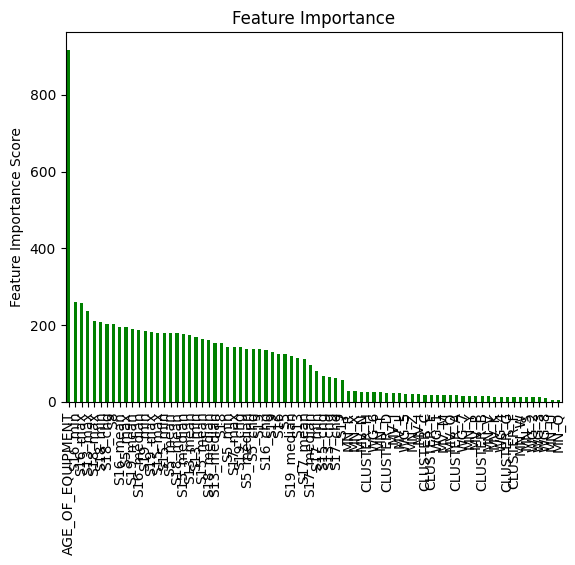

In [ ]:
evaluate_model(xgb0, independent, dependent,features)


 Evaluate the Model


The most confusing element of PM problems is building a realistic model assessment. Because of timing and the small number of failures, understanding how the model will work once deployed in production is challenging.



Evaluate the model using an AUC and accuacy metrics.


In [ ]:
df_testing=df_train_test[df_train_test['MODELING_GROUP'] == 'TESTING'].copy()
df_training=df_train_test[df_train_test['MODELING_GROUP'] != 'TESTING'].copy()

Now, we will evaluate the unbalanced training data.

The AUC-ROC score is a performance metric that evaluates the model's ability to discriminate between positive and negative instances, with values ranging from 0 to 1. A score of 0.5 indicates random guessing, while a score of 1 indicates a perfect model.



In [ ]:
df_training['P_FAIL']= xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_training['FAILURE_TARGET'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['FAILURE_TARGET'], df_training['P_FAIL']))


Accuracy : 1
AUC Score (Train): 1.000000


In [ ]:
df_testing['P_FAIL']= xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['FAILURE_TARGET'].values, df_testing['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_testing['FAILURE_TARGET'], df_testing['P_FAIL']))


Accuracy : 0.9543
AUC Score (Train): 0.518169


**df_testing['P_FAIL'] = xgb0.predict_proba(df_testing[features])[:, 1]: ** This line predicts the probabilities of the positive class (label 1) for each instance in the testing dataset. predict_proba is a method in XGBoost that outputs the predicted probabilities for each class. [:, 1] slices the second column of the predicted probabilities, which corresponds to the probability of the positive class (label 1). These probabilities are then stored in the new column 'P_FAIL' in the DataFrame df_testing.

**df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .50)), 0, 1):** This line creates a new column 'Y_FAIL' in the DataFrame df_testing. It assigns a binary value (0 or 1) to each row based on the predicted probability 'P_FAIL'. If the probability is less than or equal to 0.50, the corresponding row will be assigned the value 0, indicating a negative prediction (not failure). If the probability is greater than 0.50, the row will be assigned the value 1, indicating a positive prediction (failure).

**metrics.accuracy_score(df_testing['FAILURE_TARGET'].values, df_testing['Y_FAIL']):** This line calculates the accuracy of the model's predictions on the testing data. metrics.accuracy_score is a function from the scikit-learn library that computes the accuracy of the predicted labels compared to the true labels. The true labels are obtained from the 'FAILURE_TARGET' column in the DataFrame df_testing. The accuracy score measures the percentage of correctly classified instances in the testing data.

**metrics.roc_auc_score(df_testing['FAILURE_TARGET'], df_testing['P_FAIL']): ** This line calculates the Area Under the Receiver Operating Characteristic Curve (AUC-ROC) score for the model's predictions. metrics.roc_auc_score is another function from scikit-learn that computes the AUC-ROC score using the true labels ('FAILURE_TARGET') and the predicted probabilities ('P_FAIL'). The AUC-ROC score is a performance metric that evaluates the model's ability to discriminate between positive and negative instances, with values ranging from 0 to 1. A score of 0.5 indicates random guessing, while a score of 1 indicates a perfect model.

Evaluate the model using a simple confusion matrix.


In [ ]:
print(pd.crosstab(df_testing.Y_FAIL, df_testing.EQUIPMENT_FAILURE, dropna=False))

EQUIPMENT_FAILURE       0    1
Y_FAIL                        
0                  107851  147
1                     919    2


The ‘EQUIPMENT_FAILURE’ variable identifies a failure on the day it occurs. Let’s say that failure occurs on Friday, and we have failure signals on Monday, Tuesday, Wednesday, and Thursday, but not on Friday. I would argue that the failure on Friday is a True Positive, given that there were four failure signals in the days leading up to the failure. However, the confusion matrix above counts Monday, Tuesday, Wednesday, and Thursday as false positives and Friday as a false negative. This cross-tab alone doesn’t give us a realistic view of how the model will perform in production.

Now, we will create a confusion matrix using ‘FAILURE_TARGET.’ This variable is the predicted binary variable where the 28 days leading up to a failure are flagged as failures.

In [ ]:
print(pd.crosstab(df_testing.Y_FAIL, df_testing.FAILURE_TARGET, dropna=False))

FAILURE_TARGET       0     1
Y_FAIL                      
0               103894  4104
1                  874    47


Each failure is represented 28 different times. If a machine fails on Friday the 28th, the previous twenty-seven days of the month are also flagged as a failure. This clearly won’t work, will it?

The example above clearly does not reflect what we can expect when we push this model into production. To get a realistic evaluation of the model, we must have practical definitions of false positives, false negatives, true negatives, and false negatives.



Using Heuristics to Define a False Positive, True Positive, False Negative, and True Negative.

In [ ]:
forecast_window=90
cutoff=0.50

In [ ]:
df=df_train_test
df['P_FAIL']= xgb0.predict_proba(df[features])[:,1];
df['Y_FAIL'] = np.where(((df.P_FAIL <= cutoff)), 0, 1)

Eliminate redundant failure signals



In [ ]:
xx=df
xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])

In [ ]:
#Create a unique list of machines
aa=xx
pd_id=aa.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]
pd_id.shape

(295, 1)

In [ ]:
#Label each machine with a sequential number. We need the id to be sequential for use in a later step.
pd_id=pd_id.reset_index(drop=True)
pd_id=pd_id.reset_index(drop=False)
pd_id=pd_id.rename(columns={"index": "SCOOBYDOO"})
pd_id['SCOOBYDOO']=pd_id['SCOOBYDOO']+1
pd_id.head()

,SCOOBYDOO,ID
0,1,100001
1,2,100002
2,3,100014
3,4,100017
4,5,100018


In [ ]:
#Grab the max number of machines. We will use this in a loop in a later step.

column = pd_id['SCOOBYDOO']
max_value = column.max()+1
max_value

296

In [ ]:
#Append the sequencial number to the main file. Now each machine a sequencial id.
xx=xx.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])
xx =xx.merge(pd_id, on=['ID'], how='inner')
xx.head()


,index,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,...,WG_2,WG_3,WG_4,WG_5,WG_6,WG_7,WG_8,P_FAIL,Y_FAIL,SCOOBYDOO
0,0,100001,2014-12-02,G,O,Y,1,11.088,145.223448,39.34,...,0,0,0,0,0,0,0,0.000008,0,1
1,1,100001,2016-03-29,G,O,Y,1,18.960,0.000000,38.87,...,0,0,0,0,0,0,0,0.009255,0,1
2,2,100001,2016-03-30,G,O,Y,1,29.040,0.000000,37.36,...,0,0,0,0,0,0,0,0.018464,0,1
3,3,100001,2016-03-31,G,O,Y,1,18.000,0.000000,38.81,...,0,0,0,0,0,0,0,0.002859,0,1
4,4,100001,2016-04-01,G,O,Y,1,26.160,0.000000,39.47,...,0,0,0,0,0,0,0,0.000043,0,1


In [ ]:
#Sort the data by ID and Date and reset the index of the dataframe so it matches the sort.
xx=xx.sort_values(by=['ID','DATE'], ascending=[True,True])
#reset index
xx=xx.reset_index(drop=True)

The next few steps assign a new failure indicator that incorporates the forecast window. Note that this calculation occurs at a machine level. Doing this keeps a signal from one machine affecting another machine.

This loop takes a while to run.

The output is a new failure indicator called “Y_FAILZ.” This failure signal incorporates the forecast window and will not occur more than once every 90 days.

In [ ]:
#create a null dataframe for the next step
df_fred=xx
df_fred['Y_FAIL_sumxx']=0
df_fred=df_fred[df_fred['SCOOBYDOO'] == max_value+1]
df_fred.shape
#sum the number of signals occuring over the last 90 days for each machine individually
for x in range(max_value):
        dffx=xx[xx['SCOOBYDOO'] ==x]
        dff=dffx.copy()
        dff['Y_FAIL_sumxx'] =(dff['Y_FAIL'].rolling(min_periods=1, window=(forecast_window)).sum())
        df_fred= pd.concat([df_fred,dff])

xx=df_fred
# if a signal has occured in the last 90 days, the signal is 0.
xx['Y_FAILZ']=np.where((xx.Y_FAIL_sumxx>1), 0, xx.Y_FAIL)
df=xx

Identify the machine id for each signal. Identify the date of the failure signal.

In [ ]:
xx=df
xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])


In [ ]:
#Create signal id with the cumsum function.

xx['SIGNAL_ID'] = xx['Y_FAILZ'].cumsum()


Pull the records with a signal into a different data frame, create a new field that identifies the date of each signal (SIGNAL_DATE) and identify the machine ID Associated with each signal (ID_OF_SIGNAL).

In [ ]:
df_signals=xx[xx['Y_FAILZ'] == 1]
df_signal_date=df_signals[['SIGNAL_ID','DATE','ID']]
df_signal_date=df_signal_date.rename(index=str, columns={"DATE": "SIGNAL_DATE"})
df_signal_date=df_signal_date.rename(index=str, columns={"ID": "ID_OF_SIGNAL"})

Append ID_OF_SIGNAL and SIGNAL_DATE to the original Dataframe based on the SIGNAL_ID.

In [ ]:
xx =xx.merge(df_signal_date, on=['SIGNAL_ID'], how='outer')
df=xx.copy()

In [ ]:
df=df[['DATE', 'ID', 'EQUIPMENT_FAILURE', 'FAILURE_TARGET','FAILURE_DATE',
 'P_FAIL', 'Y_FAILZ','SIGNAL_ID',
 'SIGNAL_DATE','ID_OF_SIGNAL','MODELING_GROUP']]

Create a field called “Warning” that indicates the time from signal to failure.



In [ ]:
df['C'] = df['FAILURE_DATE'] - df['SIGNAL_DATE'].copy()
df['WARNING'] = df['C'] / np.timedelta64(1, 'D').copy()
df.head()

,DATE,ID,EQUIPMENT_FAILURE,FAILURE_TARGET,FAILURE_DATE,P_FAIL,Y_FAILZ,SIGNAL_ID,SIGNAL_DATE,ID_OF_SIGNAL,MODELING_GROUP,C,WARNING
0,2014-12-02,100001,0,0,2015-04-24,8.063382e-06,0,0,NaT,NaN,TESTING,NaT,NaN
1,2014-12-03,100001,0,0,2015-04-24,4.159480e-07,0,0,NaT,NaN,TESTING,NaT,NaN
2,2014-12-04,100001,0,0,2015-04-24,1.069239e-06,0,0,NaT,NaN,TESTING,NaT,NaN
3,2014-12-05,100001,0,0,2015-04-24,2.323576e-04,0,0,NaT,NaN,TESTING,NaT,NaN
4,2014-12-06,100001,0,0,2015-04-24,1.314291e-04,0,0,NaT,NaN,TESTING,NaT,NaN


 Create a realistic confusion matrix.


In [ ]:
# define a true positive
df['TRUE_POSITIVE'] = np.where(((df.EQUIPMENT_FAILURE == 1) & (df.WARNING<=forecast_window) &(df.WARNING>=0) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)
# define a false negative
df['FALSE_NEGATIVE'] = np.where((df.TRUE_POSITIVE==0) & (df.EQUIPMENT_FAILURE==1), 1, 0)
# define a false positive
df['BAD_S']=np.where((df.WARNING<0) | (df.WARNING>=forecast_window | df.WARNING.isnull().values.any()), 1, 0)
df['FALSE_POSITIVE'] = np.where(((df.Y_FAILZ == 1) & (df.BAD_S==1) & (df.ID_OF_SIGNAL==xx.ID)), 1, 0)
df['bootie']=1
df['CATEGORY']=np.where((df.FALSE_POSITIVE==1),'FALSE_POSITIVE',
                                      (np.where((df.FALSE_NEGATIVE==1),'FALSE_NEGATIVE',
                                                (np.where((df.TRUE_POSITIVE==1),'TRUE_POSITIVE','TRUE_NEGATIVE')))))
table = pd.pivot_table(df, values=['bootie'], index=['MODELING_GROUP'],columns=['CATEGORY'], aggfunc=np.sum)
table

bootie                                           
CATEGORY       FALSE_NEGATIVE FALSE_POSITIVE TRUE_NEGATIVE TRUE_POSITIVE
MODELING_GROUP                                                          
TESTING                 135.0           94.0      108676.0          14.0
TRAINING                  NaN            NaN      106580.0         146.0

Incorporating the Economics of the Problem.

In [ ]:
df['TOTAL_COST']=df.FALSE_NEGATIVE*30000+df.FALSE_POSITIVE*1500+df.TRUE_POSITIVE*7500

Aggregate the costs by modeling group.



In [ ]:
table = pd.pivot_table(df, values=['TOTAL_COST'],index=['MODELING_GROUP'], aggfunc=np.sum)
table

,TOTAL_COST
MODELING_GROUP,
TESTING,4296000
TRAINING,1095000


Calculate the number of machines in each modeling group.



In [ ]:
wells=df[['ID','MODELING_GROUP']]
wells=wells.drop_duplicates(subset='ID')
wells = wells.groupby(['MODELING_GROUP'])['ID'].count()
wells=pd.DataFrame(wells)
wells=wells.rename(columns={'ID': 'WELLS'})
wells


,WELLS
MODELING_GROUP,
TESTING,149
TRAINING,146


Merge the total costs and total machines into one data frame.



In [ ]:
tc = df.groupby(['MODELING_GROUP'])['TOTAL_COST'].sum()
tc=pd.DataFrame(tc)
ac =tc.merge(wells, on=['MODELING_GROUP'], how='inner')

Calculate the average cost per machine.



In [ ]:
ac['AVERAGE_COST']=ac.TOTAL_COST/ac.WELLS
ac['LIFT']=27948-ac.AVERAGE_COST
ac

,TOTAL_COST,WELLS,AVERAGE_COST,LIFT
MODELING_GROUP,,,,
TESTING,4296000,149,28832.214765,-884.214765
TRAINING,1095000,146,7500.000000,20448.000000


Fine-Tuning the solution.

First, we will define the forecast window and change the cut-off from .50 to 0.02. If the probability is less than 0.02, we expect a non-failure. If the likelihood is more than 0.02, we expect a failure. The forecast window doesn’t change.

In [ ]:
forecast_window=90
cutoff=0.02

Now, clean up the data so that only one failure signal occurs every 90 days. Associate a machine with each signal and find the date of each signal.

In [ ]:
df=df_train_test
df['P_FAIL']= xgb0.predict_proba(df[features])[:,1];
df['Y_FAIL'] = np.where(((df.P_FAIL <= cutoff)), 0, 1)
#sort the data by id and date.
xx=df
xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])
#create a unique list of machines
aa=xx
pd_id=aa.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]
#label each machine with a sequential number
pd_id=pd_id.reset_index(drop=True)
pd_id=pd_id.reset_index(drop=False)
pd_id=pd_id.rename(columns={"index": "SCOOBYDOO"})
pd_id['SCOOBYDOO']=pd_id['SCOOBYDOO']+1
pd_id.head()
#grab the max number of machines +1
column = pd_id["SCOOBYDOO"]
max_value = column.max()+1
max_value
#append sequential number to main file.  Now each machine has a sequencial id.
xx=xx.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])
xx =xx.merge(pd_id, on=['ID'], how='inner')
xx.head()
#sort data
xx=xx.sort_values(by=['ID','DATE'], ascending=[True,True])
#reset index
xx=xx.reset_index(drop=True)
#create a null dataframe for the next step
df_fred=xx
df_fred['Y_FAIL_sumxx']=0
df_fred=df_fred[df_fred['SCOOBYDOO'] == max_value+1]
df_fred.shape
#sum the number of signals occuring over the last 90 days for each machine individually
for x in range(max_value):
        dffx=xx[xx['SCOOBYDOO'] ==x]
        dff=dffx.copy()
        dff['Y_FAIL_sumxx'] =(dff['Y_FAIL'].rolling(min_periods=1, window=(forecast_window)).sum())
        df_fred= pd.concat([df_fred,dff])


xx=df_fred
# if a signal has occured in the last 90 days, the signal is 0.
xx['Y_FAILZ']=np.where((xx.Y_FAIL_sumxx>1), 0, xx.Y_FAIL)
#sort the data by id and date.
xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])
#create signal id with the cumsum function.
xx['SIGNAL_ID'] = xx['Y_FAILZ'].cumsum()
df_signals=xx[xx['Y_FAILZ'] == 1]
df_signal_date=df_signals[['SIGNAL_ID','DATE','ID']]
df_signal_date=df_signal_date.rename(index=str, columns={"DATE": "SIGNAL_DATE"})
df_signal_date=df_signal_date.rename(index=str, columns={"ID": "ID_OF_SIGNAL"})
xx =xx.merge(df_signal_date, on=['SIGNAL_ID'], how='outer')
xx=xx[['DATE', 'ID', 'EQUIPMENT_FAILURE', 'FAILURE_TARGET','FAILURE_DATE',
       'P_FAIL', 'Y_FAILZ','SIGNAL_ID',
       'SIGNAL_DATE','ID_OF_SIGNAL','MODELING_GROUP']]
xx['C'] = xx['FAILURE_DATE'] - xx['SIGNAL_DATE']
xx['WARNING'] = xx['C'] / np.timedelta64(1, 'D')
df=xx


<ipython-input-101-89f60ac9915d>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['C'] = xx['FAILURE_DATE'] - xx['SIGNAL_DATE']
<ipython-input-101-89f60ac9915d>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['WARNING'] = xx['C'] / np.timedelta64(1, 'D')


Use Heuristics to define false positives, false negatives, true positives and true negatives.

In [ ]:
# define a true positive
df['TRUE_POSITIVE'] = np.where(((df.EQUIPMENT_FAILURE == 1) & (df.WARNING<=forecast_window) &(df.WARNING>=0) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)
# define a false negative
df['FALSE_NEGATIVE'] = np.where((df.TRUE_POSITIVE==0) & (df.EQUIPMENT_FAILURE==1), 1, 0)
# define a false positive
df['BAD_S']=np.where((df.WARNING<0) | (df.WARNING>=forecast_window), 1, 0)
df['FALSE_POSITIVE'] = np.where(((df.Y_FAILZ == 1) & (df.BAD_S==1) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)
df['bootie']=1
df['CATEGORY']=np.where((df.FALSE_POSITIVE==1),'FALSE_POSITIVE',
                                      (np.where((df.FALSE_NEGATIVE==1),'FALSE_NEGATIVE',
                                                (np.where((df.TRUE_POSITIVE==1),'TRUE_POSITIVE','TRUE_NEGATIVE')))))

cross-tabulation.

In [ ]:
table = pd.pivot_table(df, values=['bootie'], index=['MODELING_GROUP'],columns=['CATEGORY'], aggfunc=np.sum)
table

bootie                                           
CATEGORY       FALSE_NEGATIVE FALSE_POSITIVE TRUE_NEGATIVE TRUE_POSITIVE
MODELING_GROUP                                                          
TESTING                    99            276        108494            50
TRAINING                    8             48        106532           138

In [ ]:
#Now we can calculate the total cost.
df['TOTAL_COST']=df.FALSE_NEGATIVE*30000+df.FALSE_POSITIVE*1500+df.TRUE_POSITIVE*7500
#Aggregate the costs by modeling group.
table = pd.pivot_table(df, values=['TOTAL_COST'],index=['MODELING_GROUP'], aggfunc=np.sum)
#Calculate the number of machines in each modeling group.
wells=df[['ID','MODELING_GROUP']]
wells=wells.drop_duplicates(subset='ID')
wells = wells.groupby(['MODELING_GROUP'])['ID'].count()
wells=pd.DataFrame(wells)
wells=wells.rename(columns={"ID": "WELLS"})
tc = df.groupby(['MODELING_GROUP'])['TOTAL_COST'].sum()
tc=pd.DataFrame(tc)
#Merge the total costs and total machines into one data frame.
ac =tc.merge(wells, on=['MODELING_GROUP'], how='inner')
#Calculate the average cost per machine.
ac['AVERAGE_COST']=ac.TOTAL_COST/ac.WELLS
ac['LIFT']=27948-ac.AVERAGE_COST
ac


,TOTAL_COST,WELLS,AVERAGE_COST,LIFT
MODELING_GROUP,,,,
TESTING,3759000,149,25228.187919,2719.812081
TRAINING,1347000,146,9226.027397,18721.972603


Validating the solution.

In [ ]:
df=df_total
df['P_FAIL']= xgb0.predict_proba(df[features])[:,1];
df['Y_FAIL'] = np.where(((df.P_FAIL <= cutoff)), 0, 1)
#sort the data by id and date.
xx=df
xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])
#create a unique list of machines
aa=xx
pd_id=aa.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]
#label each machine with a sequential number
pd_id=pd_id.reset_index(drop=True)
pd_id=pd_id.reset_index(drop=False)
pd_id=pd_id.rename(columns={"index": "SCOOBYDOO"})
pd_id['SCOOBYDOO']=pd_id['SCOOBYDOO']+1
pd_id.head()
#grab the max number of machines +1
column = pd_id["SCOOBYDOO"]
max_value = column.max()+1
max_value
#append sequential number to main file.  Now each machine has a sequencial id.
xx=xx.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])
xx =xx.merge(pd_id, on=['ID'], how='inner')
xx.head()
#sort data
xx=xx.sort_values(by=['ID','DATE'], ascending=[True,True])
#reset index
xx=xx.reset_index(drop=True)
#create a null dataframe for the next step
df_fred=xx
df_fred['Y_FAIL_sumxx']=0
df_fred=df_fred[df_fred['SCOOBYDOO'] == max_value+1]
df_fred.shape
#sum the number of signals occuring over the last 90 days for each machine individually
for x in range(max_value):
        dffx=xx[xx['SCOOBYDOO'] ==x]
        dff=dffx.copy()
        dff['Y_FAIL_sumxx'] =(dff['Y_FAIL'].rolling(min_periods=1, window=(forecast_window)).sum())
        df_fred= pd.concat([df_fred,dff])


xx=df_fred
# if a signal has occured in the last 90 days, the signal is 0.
xx['Y_FAILZ']=np.where((xx.Y_FAIL_sumxx>1), 0, xx.Y_FAIL)
#sort the data by id and date.
xx=xx.sort_values(by=['ID','DATE'], ascending=[True, True])
#create signal id with the cumsum function.
xx['SIGNAL_ID'] = xx['Y_FAILZ'].cumsum()
df_signals=xx[xx['Y_FAILZ'] == 1]
df_signal_date=df_signals[['SIGNAL_ID','DATE','ID']]
df_signal_date=df_signal_date.rename(index=str, columns={"DATE": "SIGNAL_DATE"})
df_signal_date=df_signal_date.rename(index=str, columns={"ID": "ID_OF_SIGNAL"})
xx =xx.merge(df_signal_date, on=['SIGNAL_ID'], how='outer')
xx=xx[['DATE', 'ID', 'EQUIPMENT_FAILURE', 'FAILURE_TARGET','FAILURE_DATE',
       'P_FAIL', 'Y_FAILZ','SIGNAL_ID',
       'SIGNAL_DATE','ID_OF_SIGNAL','MODELING_GROUP']]
xx['C'] = xx['FAILURE_DATE'] - xx['SIGNAL_DATE']
xx['WARNING'] = xx['C'] / np.timedelta64(1, 'D')
df=xx
# define a true positive
df['TRUE_POSITIVE'] = np.where(((df.EQUIPMENT_FAILURE == 1) & (df.WARNING<=forecast_window) &(df.WARNING>=0) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)
# define a false negative
df['FALSE_NEGATIVE'] = np.where((df.TRUE_POSITIVE==0) & (df.EQUIPMENT_FAILURE==1), 1, 0)
# define a false positive
df['BAD_S']=np.where((df.WARNING<0) | (df.WARNING>=forecast_window), 1, 0)
df['FALSE_POSITIVE'] = np.where(((df.Y_FAILZ == 1) & (df.BAD_S==1) & (df.ID_OF_SIGNAL==df.ID)), 1, 0)
df['bootie']=1
df['CATEGORY']=np.where((df.FALSE_POSITIVE==1),'FALSE_POSITIVE',
                                      (np.where((df.FALSE_NEGATIVE==1),'FALSE_NEGATIVE',
                                                (np.where((df.TRUE_POSITIVE==1),'TRUE_POSITIVE','TRUE_NEGATIVE')))))
#Now we can calculate the total cost.
df['TOTAL_COST']=df.FALSE_NEGATIVE*30000+df.FALSE_POSITIVE*1500+df.TRUE_POSITIVE*7500
#Aggregate the costs by modeling group.
table = pd.pivot_table(df, values=['TOTAL_COST'],index=['MODELING_GROUP'], aggfunc=np.sum)
#Calculate the number of machines in each modeling group.
wells=df[['ID','MODELING_GROUP']]
wells=wells.drop_duplicates(subset='ID')
wells = wells.groupby(['MODELING_GROUP'])['ID'].count()
wells=pd.DataFrame(wells)
wells=wells.rename(columns={"ID": "WELLS"})
tc = df.groupby(['MODELING_GROUP'])['TOTAL_COST'].sum()
tc=pd.DataFrame(tc)
#Merge the total costs and total machines into one data frame.
ac =tc.merge(wells, on=['MODELING_GROUP'], how='inner')
#Calculate the average cost per machine.
ac['AVERAGE_COST']=ac.TOTAL_COST/ac.WELLS
ac['LIFT']=27948-ac.AVERAGE_COST
ac


<ipython-input-105-45c9c9b9f33f>:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['C'] = xx['FAILURE_DATE'] - xx['SIGNAL_DATE']
<ipython-input-105-45c9c9b9f33f>:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xx['WARNING'] = xx['C'] / np.timedelta64(1, 'D')
<ipython-input-105-45c9c9b9f33f>:62: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

,TOTAL_COST,WELLS,AVERAGE_COST,LIFT
MODELING_GROUP,,,,
TESTING,3759000,149,25228.187919,2719.812081
TRAINING,1347000,146,9226.027397,18721.972603
VALIDATION,3064500,126,24321.428571,3626.571429
